In [1]:
import pandas as pd

In [2]:
df_feature_x = pd.read_csv("preprocess.csv", index_col=0)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,13
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,40,30,2
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,5
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26,18,17
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14,5,4
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,21,3
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,16,6


In [3]:
df_feature_y = pd.read_csv("label.csv", index_col=0)
df_feature_y.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_feature_x, df_feature_y, test_size=0.1, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 73462
Train data: 66115
Validation data: 7347


In [5]:
EPOCH = 20
LEARNING_RATE = 1e-3

In [6]:
import tensorflow as tf
len_feature = len(df_feature_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

2023-11-08 18:37:10.477887: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 18:37:10.477953: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 18:37:10.477984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 18:37:10.487517: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


2023-11-08 18:37:12.693169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 18:37:12.732526: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 18:37:12.732620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 18:37:12.736040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 18:37:12.736144: I tensorflow/compile

2067/2067 [==============================] - 13s 6ms/step - loss: 0.6425 - accuracy: 0.7471 - val_loss: 0.4539 - val_accuracy: 0.7830
Epoch 2/20
2067/2067 [==============================] - 11s 5ms/step - loss: 0.4496 - accuracy: 0.7797 - val_loss: 0.4545 - val_accuracy: 0.7792
Epoch 3/20
2067/2067 [==============================] - 11s 5ms/step - loss: 0.4472 - accuracy: 0.7809 - val_loss: 0.4422 - val_accuracy: 0.7869
Epoch 4/20
2067/2067 [==============================] - 11s 6ms/step - loss: 0.4465 - accuracy: 0.7809 - val_loss: 0.4467 - val_accuracy: 0.7830
Epoch 5/20
2067/2067 [==============================] - 11s 5ms/step - loss: 0.4455 - accuracy: 0.7811 - val_loss: 0.4508 - val_accuracy: 0.7803
Epoch 6/20
2067/2067 [==============================] - 11s 5ms/step - loss: 0.4450 - accuracy: 0.7816 - val_loss: 0.4485 - val_accuracy: 0.7777
Epoch 7/20
2067/2067 [==============================] - 11s 5ms/step - loss: 0.4442 - accuracy: 0.7824 - val_loss: 0.4425 - val_accuracy: 0.7

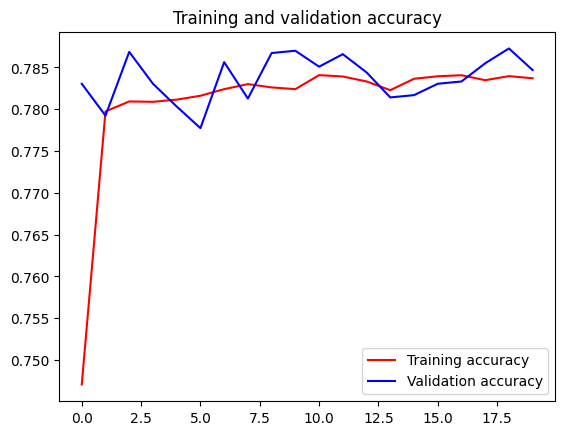

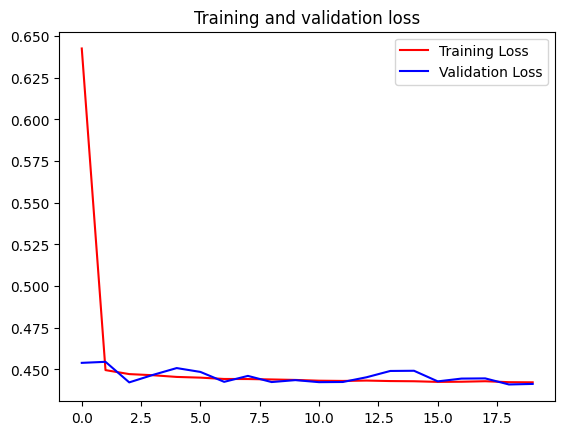

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
model.predict([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234]])

1/1 [==============================] - 0s 108ms/step


array([[9.9997354e-01, 2.6481554e-05]], dtype=float32)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 394 (1.54 KB)
Trainable params: 394 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
saved_model = "mdl_wo_std/model_without_std.h5"
model.save(saved_model)

/home/abayup14/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
!tensorflowjs_converter --input_format=keras {saved_model} ./mdl_wo_std

2023-11-08 18:41:41.715916: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 18:41:41.715999: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 18:41:41.716024: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Cari model TF.JS di folder mdl_wo_std